## Working with dates and times in Python

This is a vital skill because many data include date/time information. 

This type of date often comes in different format: 

- Where you have a compound date format, like January 1, 1901, separating each component value and converting it to its numeric form is cumbersome.
- There are many different formats, e.g. 12-hour time versus 24-hour time.
- Adding and subtracting across date/time boundaries isn't easy — for instance, if I wanted to add 1 hour 35 minutes to the time 32 minutes, we need to account for the fact that there are 60 minutes in an hour to be able to come up with the correct answer, 2 hours 7 minutes.

Luckily, Python comes with functionality that makes working with dates and times easier. In this mission, we'll learn this functionality while working with a data set of White House visitors. 

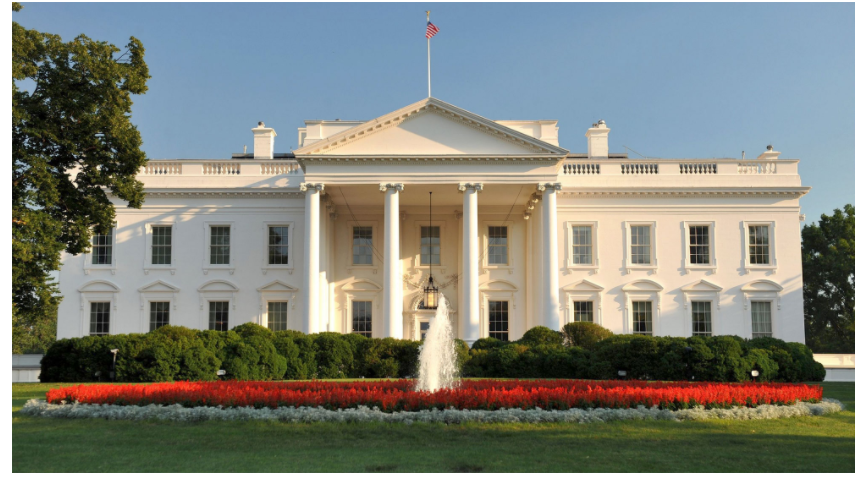

In December 2009, the White House started publishing records of visitors to the White House. Over a seven-year span, almost six million visitor records were published. The records contain data from the WAVES (Workers and Visitors Entry System) appointment system that is used to make appointments for all White House visitors, excluding staff members and other people not categorized as visitors.

The full set of records can be found on the Obama White House Archives Site, but in this mission we'll be working with a smaller version of the dataset, `potus_visitors_2015.csv`, which only includes visitors who met with the president in 2015. We've also removed and cleaned some columns for teaching purposes; however, we have not modified any of the date columns. Let's take a look at the first few rows of the data:

In [8]:
from csv import reader

with open('potus_visitors_2015.csv', 'r') as f:
    potus = list( reader(f) )
    
potus = potus[1:]

potus[:3]

[['Joshua T. Blanton',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Jack T. Gutting',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard'],
 ['Bradley T. Guiles',
  '2014-12-18T00:00:00',
  '1/6/15 9:30',
  '1/6/15 23:59',
  '',
  'potus',
  'west wing',
  'JointService Military Honor Guard']]

Python has three standard modules that are designed to help working with dates and times:

- The `calendar` module
- The `time` module
- The `datetime` module

While each module has a particular area of focus, there is a lot of crossover functionality. The most useful module for working with data — and the module we'll learn about in this mission — is the **`datetime` module**.

### The datetime module

The datetime module contains a number of classes, including:

- `datetime.datetime`: For working with date and time data.
- `datetime.time`: For working with time data only.
- `datetime.timedelta`: For representing time periods.

The `datetime.datetime` class is the most commonly-used class from the datetime module, and has attributes and methods designed to work with data containing both the date and time. The signature of the class is below (with some lesser used parameters omitted):

```
datetime.datetime(year, month, day, hour=0, minute=0, second=0)
```


**Some examples:**

In [9]:
import datetime as dt

In [10]:
eg_1 = dt.datetime(2000, 1, 1)
print(eg_1)

2000-01-01 00:00:00


In [11]:
eg_2 = dt.datetime(1985, 3, 13, 21, 26, 2)
print(eg_2)

1985-03-13 21:26:02


In [12]:
eg_3 = dt.datetime(1998, 7, 7, 8, 39)
print(eg_3)

1998-07-07 08:39:00


#### The `datetime.strptime()` constructor

It returns a datetime object defined using a special syntax system to describe date and time formats called **strftime**. 

The strftime syntax uses a series of format codes consisting of a % character followed by a single character which specifies a date or time part in a particular format. Let's look at an example for parsing the date in the string "24/12/1984":

![Image](Images/datetime_strptime.png)

The first argument of the `datetime.strptime()` constructor is the string we want to parse, and the second argument is a string that specifies the format.

The `%d`, `%m`, and `%Y` format codes specify a two-digit day, two-digit month, and four-digit year respectively, and the forward slashes between them specify the forward slashes in the original string

Example:

In [13]:
date_1_str = "24/12/1984"
date_1_dt = dt.datetime.strptime(date_1_str, "%d/%m/%Y")

print(type(date_1_dt))
print(date_1_dt)

<class 'datetime.datetime'>
1984-12-24 00:00:00


We can see that the constructor returns a datetime object. Let's look at another example — `"12-24-1984"` – the same date, but in our string the date parts are separated using a dash instead of a slash, and the order of the day/month are reversed:

![Image](Images/datetime_strptime_2.png)

In [14]:
# In code:
date_2_str = "12-24-1984"
date_2_dt = dt.datetime.strptime(date_2_str, "%m-%d-%Y")

print(date_2_dt)

1984-12-24 00:00:00


A table of the most common format codes is below. Don't worry about the fact that there's lots of them — you shouldn't aim to try and remember them all. Instead, simply look them up in the relevant section of the Python documentation when you need them, or you can use the handy micro-site strftime.org, which contains the same information found in the documentation, but in a slightly easier-to-read format.


![Image](Images/table_of_formats.png)
![Image](Images/below.png)

### Turning back to our dataset:

In [15]:
# Substituting date with strptime

date_format = "%m/%d/%y %H:%M"

for row in potus:
    start_date = row[2]
    row[2] = dt.datetime.strptime(start_date, date_format)

### `Datetime`'s attributes

The datetime class has a number of attributes which make it easy to retrieve the various parts that make up the date stored within the object:

- `datetime.day`: The day of the month.
- `datetime.month`: The month of the year.
- `datetime.year`: The year.
- `datetime.hour`: The hour of the day.
- `datetime.minute`: The minute of the hour.

If we wanted to create string representation of a datetime object representing the date like December 24th, 1984 in the form day/month/year, we could use those attributes to extract the values, and then insert them into a string:

In [16]:
dt_object = dt.datetime(1984, 12, 24)

day = dt_object.day
month = dt_object.month
year = dt_object.year

dt_string = "{}/{}/{}".format(day, month, year)
print(dt_string)

24/12/1984


This is a lot of code for a simple task, and our code would need to be even more complex if we wanted to represent the date using words, like *Monday December 24, 1984*.

Luckily, the datetime class has a `datetime.strftime()` method which will **return a string representation of the date using the strftime** syntax we learned in the previous screen. It's easy to get strptime and strftime confused. An easy way to remember which is which is:

- `strptime` >> str-p-time >> string *parse* time
- `strftime` >> str-f-time >> string *format* time

With the `strftime()` method we can use `%d`, `%m`, and `%Y` to represent the day, month, and year.

In [17]:
dt_object = dt.datetime(1984, 12, 24)

dt_string = dt_object.strftime("%d/%m/%Y")

print(type(dt_string))
print(dt_string)

<class 'str'>
24/12/1984


We can also use `%B` to represent the month as a word:

In [18]:
dt_string = dt_object.strftime("%B %d, %Y")

print(dt_string)

December 24, 1984


And we can use %A, %I, %M, and %p to represent the day of the week, the hour of the day, the minute of the hour, and a.m./p.m.:

In [19]:
dt_string = dt_object.strftime("%A %B %d at %I:%M %p")

print(dt_string)

Monday December 24 at 12:00 AM


Let's use the `datetime.strftime()` method to create a formatted frequency table and analyze the appointment dates in our data set. We'll:

- Iterate over each of the datetime objects we created in the previous screen.
- Create a string containing the month and year from each datetime object.
- Create a frequency table for the month/year of the appointments.

In [20]:
visitors_per_month = {}

for row in potus:
    datetime = row[2]
    date_str = dt.datetime.strftime(datetime, "%B, %Y")
    if date_str in visitors_per_month:
        visitors_per_month[date_str] += 1
    else:
        visitors_per_month[date_str] = 1

In [21]:
visitors_per_month

{'January, 2015': 1248,
 'February, 2015': 2165,
 'March, 2015': 2262,
 'April, 2015': 4996,
 'May, 2015': 3013,
 'June, 2015': 7743,
 'July, 2015': 2930,
 'August, 2015': 1350,
 'September, 2015': 4416,
 'October, 2015': 3669,
 'November, 2015': 1133,
 'December, 2015': 13029}

### Analyzing the presidential appointment times. 

To achieve this, we're going to use the `datetime.time` class. Where the datetime class can hold values for dates and times, the time class holds only time data: hours, minutes, seconds, and microseconds.

The syntax to instantiate a time object is as follows:

```
datetime.time(hour=0, minute=0, second=0, microsecond=0)
```

In [22]:
# Examples: 
two_thirty = dt.time(14, 30)  #14:30
print(two_thirty)

14:30:00


In [23]:
five_sec_after_8am = dt.time(8,0,5)
print(five_sec_after_8am)

08:00:05


We can also create a time object from a datetime object, using the `datetime.datetime.time() `method. This method returns a time object representing the time data from the datetime object.

In [24]:
jfk_shot_dt = dt.datetime(1963, 11, 22, 12, 30)
print(jfk_shot_dt)

1963-11-22 12:30:00


In [25]:
jfk_shot_t = jfk_shot_dt.time()
print(jfk_shot_t)

12:30:00


The `time` class doesn't have a `strptime()` constructor, but if we need to parse times in string form, we can use datetime.strptime() and then convert directly to a time object:

In [26]:
time_str = "8:00"
time_dt = dt.datetime.strptime(time_str,"%H:%M")
print(time_dt)

1900-01-01 08:00:00


In [27]:
time_t = time_dt.time()
print(time_t)

08:00:00


Apart from having no strptime constructor, time objects behave similarly to datetime objects:

- They have attributes like `time.hour` and `time.second` that you can use to access individual time components.
- They have a `time.strftime()` method, which you can use to create a formatted string representation of the object.

Because we have already converted the app_start_date column to datetime objects, it's easy for us to convert them to time objects. Let's loop over our potus list of lists and create a list of appointment times which we can analyze on the following screen.

In [28]:
appt_times = []

for row in potus:
    datetime_appt = row[2]
    appt_t = datetime_appt.time()
    appt_times.append(appt_t)

In [29]:
appt_times[:10]

[datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30),
 datetime.time(9, 30)]

A useful feature of time objects is that they support comparisons. We can test if one time is greater — or later — than another:

In [30]:
t1 = dt.time(15, 30)
t2 = dt.time(10, 45)

comparison = t1 > t2
print(comparison)

True


Because these comparison operations are supported, Python built-in functions like min() and max() can also be used. These are the earliest and latest appointment times from the dataset:

In [31]:
min_time = min(appt_times)
print(min_time)

max_time = max(appt_times)
print(max_time)

06:00:00
21:30:00


### Calculations with Dates and Times

If we try to add two date objects using the `+` operator, we get a `TypeError` that tells us the operator is not valid.

When we use the `-` operator with two date objects, the result is the time difference between the two datetime objects. Let's look at the type of the resultant object:


In [34]:
dt1 = dt.datetime(2022, 4, 14)
dt2 = dt.datetime(2022, 3, 29)
print(dt1 + dt2)

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'

In [35]:
print(dt1 - dt2)

16 days, 0:00:00


In [36]:
diff = dt1 - dt2
print(type(diff))

<class 'datetime.timedelta'>


The resultant object is a **`datetime.timedelta` object**. The timedelta type represents a period of time, compared with the other classes we've seen which represent a specific moment in time.

We observed that we can create an object of the timedelta class using the - operator, but we can also instantiate a timedelta class directly. Let's look at the syntax used for this:```

```
datetime.timedelta(days=0, seconds=0, microseconds=0,
                   milliseconds=0, minutes=0, hours=0, weeks=0)
```

You might notice that the ordering of the parameters doesn't follow the order you might expect, and for this reason it can be clearer to use keyword arguments when instantiating objects if we are using anything other than days:

In [37]:
two_days = dt.timedelta(2)
print(two_days)

2 days, 0:00:00


In [38]:
three_weeks = dt.timedelta(weeks=3)
print(three_weeks)

21 days, 0:00:00


In [39]:
one_hr_ten_mins = dt.timedelta(hours=1, minutes=10)
print(one_hr_ten_mins)

1:10:00


**We can also use timedelta objects to add or subtract time from datetime objects**. Let's look at the example below, where we look to find the date one week from a date object:

In [40]:
d1 = dt.date(1963, 2, 21)
d1_plus_1wk = d1 + dt.timedelta(weeks=1)
print(d1_plus_1wk)

1963-02-28


The table below shows some of the different operations that we can make between timedelta and datetime objects.

![Image](Images/timedelta_table.png)

In [41]:
dt_1 = dt.datetime(1981, 1, 31)
dt_2 = dt.datetime(1984, 6, 28)
dt_3 = dt.datetime(2016, 5, 24)
dt_4 = dt.datetime(2001, 1, 1, 8, 24, 13)


answer_1 = dt_2 - dt_1
answer_2 = dt_3 + dt.timedelta(56)
answer_3 = dt_4 - dt.timedelta(seconds = 3600) 

### Analyzing lenght meetings.

An exaple to calculate the lenght of a meeting:

In [42]:
start_time = dt.datetime(2015, 1, 6, 9, 30)
end_time = dt.datetime(2015, 1, 6, 10, 30)
meeting_length = end_time - start_time
print(meeting_length)

1:00:00


We can use this technique in a loop to calculate the meeting length of each meeting in our White House visitors data set. As an extra analysis step, we'll:

- Create a frequency table of the meeting times.
- Calculate the minimum and maximum value for the appointment lengths.

In order to calculate the minimum and maximum meeting times from our frequency table, we can just use the min() and max() functions on the dictionary, and they will return the minimum and maximum keys from that dictionary.

In [43]:
for row in potus:
    end_date = row[3]
    end_date = dt.datetime.strptime(end_date, "%m/%d/%y %H:%M")
    row[3] = end_date
    
appt_lengths = {}

for row in potus:
    appt_start_date = row[2]
    appt_end_date = row[3]
    length = appt_end_date - appt_start_date
    if length not in appt_lengths:
        appt_lengths[length] = 1
    else:
        appt_lengths[length] += 1
    
min_length = min(appt_lengths)
max_length = max(appt_lengths)

In [44]:
print(min_length)

2:29:00


In [45]:
print(max_length)

16 days, 12:59:00
